# Online MSc Artificial Intelligence: Reinforcement Learning
## Graded Assessment 1: Racetrack

In this assignment, you will implement and compare the performance of three reinforcement learning algorithms: On-Policy First-Visit Monte-Carlo Control, Sarsa, and Q-Learning.

**Total number of marks:** 40 marks.

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**. Please do not include any identifying information on the files you submit. This coursework will be marked **anonymously**.

You are required to **work individually**. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code**.

**Do not plagiarise**. Plagiarism is a serious academic offence. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that question. Please **do not duplicate or delete existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

Please **do not use any non-standard, third-party libraries** apart from numpy and matplotlib. In this assignment, you should also use the `racetrack_env.py` file, which we have provided for you. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please remember to **save your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

Your total runtime must be less than **10 minutes**, and **written answer length limits** must be adhered to. Otherwise, you may not get credit for your work.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `render()`.


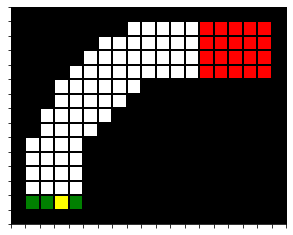

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `render()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

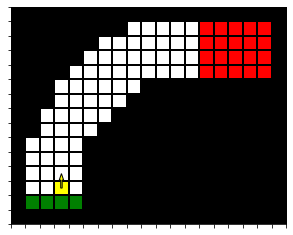

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

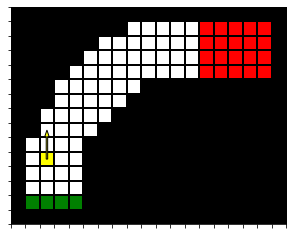

In [3]:
num_steps = 25
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: On-Policy MC Control (6 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using On-Policy First-Visit MC Control, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 5.4 p.101).

<img src="images/mc_control_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents trained should be at **least** $20$.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of tabular **On-Policy First-Visit MC Control** should produce a list named `mc_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `mc_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [4]:
# Please write your code for Exercise 1 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your MC agent here.
# Do NOT delete this cell.

# YOUR CODE HERE
from collections import defaultdict
import time


running_start = time.time()
start = time.time()        
 
def epsilon_greedy(Q, s, epsilon):
    # choosing an action in your greedy policy 
     
    if np.random.random() < epsilon:
        #explore
        return np.random.choice(env.get_actions())
    
    else:
        # act greedy 
        # break ties randomly between equal-valued state actions that have the maximum values   
        ties_options = [key for m in [max(Q[s].values())] for key,val in Q[s].items() if val == m]
        return np.random.choice(ties_options)
        
def digest_episode_learing(episode_memory, gamma, Returns, Q):
    
    # update Returns and Q after episode completion
    G = 0
    for _ in range(len(episode_memory)):
    
        # start with the last step and go backward
        step_memory = episode_memory.pop()
        State_Action = step_memory [0]
        State, Action = State_Action
        G = step_memory[1] + gamma * G
        
        #check if (S,A) pair appear in earlier steps of the episode 
        if not State_Action in [episode_memory[number][0] for number in range(len(episode_memory))]:
            Returns[State_Action].append(G)
            Q[State][Action] = np.average(Returns[State_Action])
    return Returns, Q
      
       
gamma, epsilon, n_training_episodes, n_agents_trained   = 0.9, 0.15, 150, 30

mc_rewards = []
agent_training_time = []
training_start = time.time()

# train several agents
for n_agents_train in range(n_agents_trained):
    start_agent = time.time()
    # initialize Returns and Q dictionaries 
    Q, Returns= defaultdict(dict), defaultdict(list)
    episode_memory, episode_reward = [], []
    
    # Instantiate environment object.
    env = RacetrackEnv()
    state = env.reset()
    
    for episode in range(n_training_episodes):
        undiscounted_reward, step, terminal = 0, 0, False
        env.reset()
        #repeat forever (for each episode) till terminal is reached
        while not terminal:
            if not state in Q.keys():
                # intialize Q-value  
                Q[state] = {x: 0 for x in env.get_actions()}
            #generate an action   
            action = epsilon_greedy(Q, state, epsilon)
            
            #act upon the chosen action and observe next state, reward 
            next_state, reward, terminal = env.step(action)
            
            #record the result in episode memory 
            episode_memory.append([(state, action), reward])
            
            #accumlate episode reward
            undiscounted_reward += reward
            state = next_state
            step += 1
            
        #record accumlated undiscounted reward    
        episode_reward.append(undiscounted_reward)
        
        
        
        #update the Q table following the conclusion of episode  
        Returns, Q = digest_episode_learing(episode_memory, gamma, Returns, Q)               
    
    #collect time take to train one agent
    agent_training_time.append(time.time()-start_agent)
    mc_rewards.append(episode_reward)
    
print(f'{n_agents_train+1} Agent trained for total of {round(time.time()-training_start, 1)} sec. One agent took {round(np.average(agent_training_time))} sec on average to train.')


30 Agent trained for total of 216.2 sec. One agent took 7 sec on average to train.


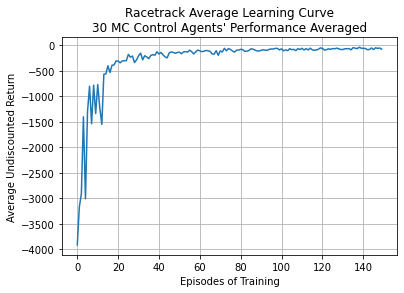

In [5]:
# We will use this cell to plot learning curves based on your agent's performance.
# Do NOT delete this cell.

from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking MC Control Results for Obvious Issues.
simple_issue_checking(mc_rewards)

# Plotting MC Control Learning Curve.
%matplotlib inline
plot_results(mc_rewards = mc_rewards)

## Exercise 2: Sarsa (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Sarsa algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.4 p.129).

<img src="images/sarsa_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents trained should be at **least** $20$.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of tabular **Sarsa** should produce a list named `sarsa_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `sarsa_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [6]:
# Please write your code for Exercise 2 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your sarsa agent here.
# Do NOT delete this cell.

# YOUR CODE HERE
alpha, gamma, epsilon, n_training_episodes, n_agents_trained  = 0.2, 0.9, 0.15, 150, 30
sarsa_rewards = []
training_start = time.time()
agent_training_time = []

# train several agents
for n_agents_train in range(n_agents_trained):
    start_agent = time.time()
    Q = defaultdict(dict)
    
    # instantiate environment object.
    env = RacetrackEnv()
    episode_reward = []
    
    # train several agents
    for episode in range(n_training_episodes):
        state = env.reset()
        undiscounted_reward, terminal = 0, False
        
        #initiate state action-values 
        if not state in Q.keys(): 
            Q[state] = {x: 0 for x in env.get_actions()}
     
        action = epsilon_greedy(Q, state, epsilon)  
        while not terminal:
            next_state, reward, terminal = env.step(action)
            if not next_state in Q.keys(): 
                Q[next_state] = {x: 0 for x in env.get_actions()}
            # generate an episode following epsilon soft policy 
            next_action = epsilon_greedy(Q, next_state, epsilon)
            
            #update Q step-by-step using bootstrapping
            Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action]- Q[state][action])
            action = next_action
            state = next_state 
            
            #accumlate episode reward
            undiscounted_reward += reward
        
        episode_reward.append(undiscounted_reward)
    
    #collect time take to train one agent
    agent_training_time.append(time.time()-start_agent)
    sarsa_rewards.append(episode_reward)
        
print(f'{n_agents_train+1} Agent trained for total of {round(time.time()-training_start, 1)} sec. One agent took {round(np.average(agent_training_time))} sec on average to train.')


30 Agent trained for total of 35.8 sec. One agent took 1 sec on average to train.


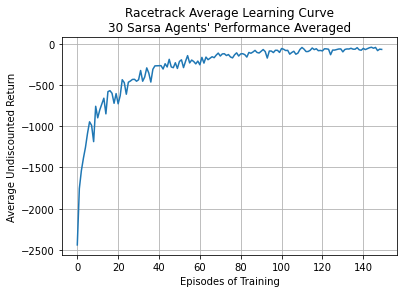

In [7]:
# We will use this cell to plot learning curves based on your agent's performance.
# Do NOT delete this cell.

from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Sarsa Results for Obvious Issues.
simple_issue_checking(sarsa_rewards)

# Plotting Sarsa Learning Curve.
%matplotlib inline
plot_results(sarsa_rewards = sarsa_rewards)

## Exercise 3: Q-Learning (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Q-Learning algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131).

<img src="images/q_learning_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents trained should be at **least** $20$.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of tabular **Q-Learning** should produce a list named `q_learning_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `q_learning_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

Hint: Your Q-Learning implementation is likely to be similar to your Sarsa implementation. Think hard about where these two algorithms differ.

In [8]:
# Please write your code for Exercise 3 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your q-learning agent here.
# Do NOT delete this cell.

# YOUR CODE HERE
alpha, gamma, epsilon, n_training_episodes, n_agents_trained   = 0.2, 0.9, 0.15, 150, 30
  
q_learning_rewards = []
training_start = time.time()
agent_training_time = []

# train several agents
for n_agents_train in range(n_agents_trained):
    start_agent = time.time()
    Q = {}
    # Instantiate environment object.
    env = RacetrackEnv()
    episode_reward = []
    state = env.reset()
    
    for episode in range(n_training_episodes):
        state = env.reset()
        undiscounted_reward, terminal = 0, False
        while not terminal:
            #initiate Q if the state has not been explored before
            if not state in Q.keys(): 
                Q[state] = {x: 0 for x in env.get_actions()}
                
            action = epsilon_greedy(Q, state, epsilon)  
            next_state, reward, terminal = env.step(action)
            #initiate Q if the state has not been explored before
            if not next_state in Q.keys(): 
                Q[next_state] = {x: 0 for x in env.get_actions()}

            #select action in the next state what has the maximum value and break ties randomly 
            max_next_action = np.random.choice([key for m in [max(Q[next_state].values())] for key,val in Q[next_state].items() if val == m])
            
            #update Q step-by-step using bootstrapping
            Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][max_next_action]- Q[state][action])

            state = next_state
            
            #accumlate episode reward
            undiscounted_reward += reward
            
        episode_reward.append(undiscounted_reward)
    
    agent_training_time.append(time.time()-start_agent)
    q_learning_rewards.append(episode_reward)
        
print(f'{n_agents_train+1} Agent trained for total of {round(time.time()-training_start, 1)} sec. One agent took {round(np.average(agent_training_time))} sec on average to train.')


30 Agent trained for total of 68.3 sec. One agent took 2 sec on average to train.


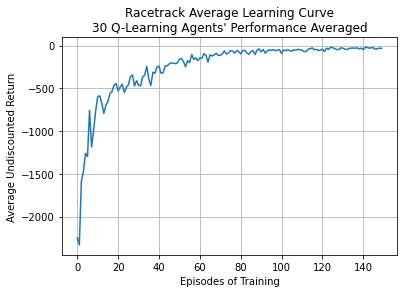

In [9]:
# We will use this cell to plot learning curves based on your agent's performance.
# Do NOT delete this cell.

from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Q-Learning Results for Obvious Issues.
simple_issue_checking(q_learning_rewards)

# Plotting Q-Learning Learning Curve.
%matplotlib inline
plot_results(q_learning_rewards = q_learning_rewards)

## Exercise 4: Comparison & Discussion (10 Marks)

Below, we have used your results to plot your three previous learning curves on the same set of axes. <br />
A cropped version of this graph has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

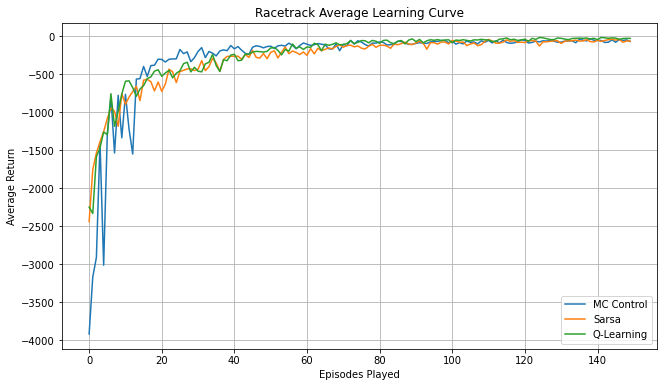

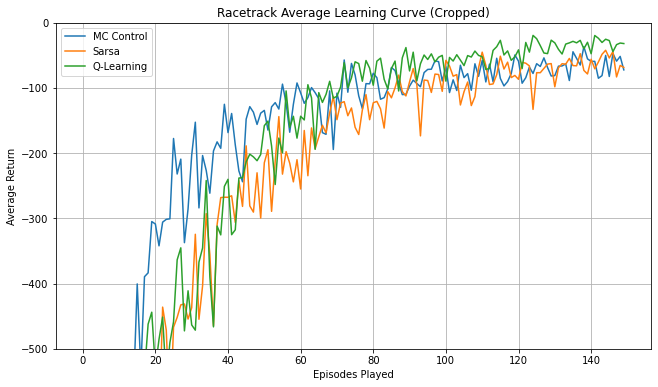

In [10]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results(mc_rewards, sarsa_rewards, q_learning_rewards)

Based on your results, and your understanding of the algorithms that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** Briefly compare the performance of each of your agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this was the case?

**Question 4:** What could be done to improve the performance of your agents?

Please write your answers for Exercise 4 in this markdown cell.

**Answer 1:**
MC Control agent performs better in early episodes in comparison with TD-control-based agent. Around 60th episode, Q-learning agent bypasses MC control agent and achieve the best return in average whereas Sarsa agent lags behind and catches up with the other twos only around 100th episode.  

**Answer 2:**
Agents following TD-based agents (i.e. Sara and Q learning) get higher average reward after first episode (~2300 vs -3900 for MC agent) due to TD agents updating the value of a state after each step and bootstrap off of existing value for that state's successors. This allows TD methods to learn from shorter fragments of experience than full episodes (used by Monte Carlo to update its Q estimates).   

**Answer 3:**
The Sarsa algorithm has faster convergence characteristics noticeably in the first 20 episodes, while the Q-learning algorithm has a better final performance. This is due to Sarsa acting as on-policy method during learning and exploring states that could be not the optimal choices and getting penalized that is reflected in relatively lower episode return compared to Q-learning method (learns and act per an optimal policy that do not explore as much)

**Answer 4:**
Use of decaying epsilon for balancing exploration and exploitation, especially toward the start of the episode, agent needs to explore (using less greedy policy, higher epsilon) then switch to lower epsilon as the policy mature where agent starts acting greedily toward the end of the epsiode.Also,  although it may delay finding of the optimal policy, decaying learning rate could also helps arriving to more accurate Q-values by taking smaller learning steps as we progress in learning (approaching the true Q-value).  

## Exercise 5: Modified Q-Learning Agent (18 Marks)
### Exercise 5a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent which learns to reach a goal state in the racetrack more efficiently than your previous Q-Learning agent. You may base your implementation on Q-Learning, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve higher performance and/or more efficient learning (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in the unit, and can be found in the course textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core.

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** $2$.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


In [11]:
# Please write your code for Exercise 5a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified agent here.
# Do NOT delete this cell.

# YOUR CODE HERE
# Please write your code for Exercise 5a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified agent here.
# Do NOT delete this cell.

# YOUR CODE HERE

from math import sqrt

n_training_episodes = 150
n_agents_trained = 20

#decaying epsilon 
min_epsilon = 0.05
max_epsilon = 0.23
exploration_decay_rate = 0.003

#parameters
alpha_learning_rate, gamma, k_exploration_rate, n_steps =  0.2, 0.9, 0.001, 30

modified_agent_rewards = []
training_start = time.time()
agent_training_time = []
# train several agents on dyna-Q+ algorithm
for n_agents_train in range(n_agents_trained):
    start_agent = time.time()
    Q = defaultdict(dict)
    model = defaultdict(dict)
    eligibility_trace = defaultdict(dict)

    # instantiate environment object 
    env = RacetrackEnv()
    episode_reward = []
    state_v = []
    visited = defaultdict(dict)

    step = 1# train several agents
    for episode in range(n_training_episodes):
        state = env.reset()
        undiscounted_reward, terminal = 0, False
        
        ##decaying epsilon defined per episode
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-exploration_decay_rate*episode)
        
        #constant learning rate
        alpha_learning_rate = 0.2
        #initiate Q 
        if not state in Q.keys(): 
            Q[state] = {x: 0 for x in env.get_actions()}

        while not terminal and time.time() - running_start < 595:  

            action = epsilon_greedy(Q, state, epsilon)  
            next_state, reward, terminal = env.step(action)

            if not next_state in Q.keys(): 
                Q[next_state] = {x: 0 for x in env.get_actions()}

            max_next_action = np.random.choice([key for m in [max(Q[next_state].values())] for key,val in Q[next_state].items() if val == m])
            Q[state][action] = Q[state][action] + alpha_learning_rate * (reward + gamma * Q[next_state][max_next_action] - (Q[state][action]))

            #update model with reward and next_state
            model[state][action] = (reward, next_state, step)

            #store visited states and actions taken from state
            state_v.append(state)
            visited[state][action] = 1

            #perform N planning updates per time-step  
            for i in range(n_steps):
                #random previously observed state
                s = random.choice(state_v)

                #random action taken in given state
                a = random.choice([indx for indx, num in visited[s].items()])

                #get reward and next state from model
                r, n_state, step_ = model[s][a]

                max_n_action = np.random.choice([key for m in [max(Q[n_state].values())] for key,val in Q[n_state].items() if val == m])

                #update Q-table
                Q[s][a] = Q[s][a] + alpha_learning_rate *(r + k_exploration_rate * sqrt(step - step_) + gamma* Q[n_state][max_n_action] - Q[s][a])


            state = next_state 
            step += 1 
            undiscounted_reward += reward
        episode_reward.append(undiscounted_reward)

    if not all(v == 0 for v in episode_reward):
        agent_training_time.append(time.time()-start_agent)
        modified_agent_rewards.append(episode_reward)
         
print(f'{n_agents_train+1} Agent trained for total of {round(time.time()-training_start, 1)} sec. One agent took {round(np.average(agent_training_time))} sec on average to train.')

20 Agent trained for total of 272.1 sec. One agent took 16 sec on average to train.


### Exercise 5b: Comparison & Discussion

Below, we have used your results to plot a the performance of your modified agent and your previous Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

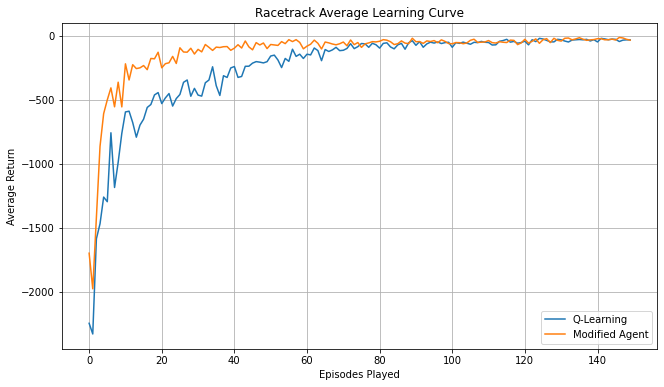

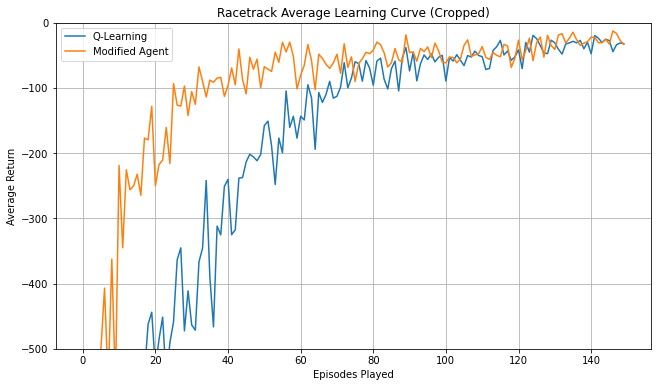

In [12]:
# We will use this cell to plot learning curves based on your agent's performance.
# Do NOT delete this cell.

from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(q_learning_rewards, modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 5b in this markdown cell.

**Answer 1:**
I chose to: 
* transform my Q-learning agent to dyna-Q+ by constructing a model learning and an indirect reinforcement learning where 30-steps planning updates are performed including an exploration bonus . 
* replace the constant epsilon by a decaying epsilon with a exploration decay rate of 0.003. 

**Answer 2:**
I expect the dyna-Q+-based agent to perform better by 1- converging quicker as this algorithm speed up the propagation of value changes which improves the learning efficiency and results in much faster learning. 2-  exploration bonus ensure better adoption to the stochastic environment. Decaying epsilon will ensure that more exploration is done in the early episode then agent is taking an almost 'deterministic' greedy policy toward the end of the 150 episodes (minimum epsilon = 0.05). 

**Answer 3:**
In short, yes, it is true that a modified agent starts at a similar return level after first episode but that is mainly due to epsilon being at its maximum value (maximum exploration) then it converges quicker compared to Q-learning agent due to the better propagation of value changes then stabilise better after convergence.  

**Answer 4:**
A comprehensive parameters tuning with different combinations of n_steps, alpha_learning_rate, gamma, k_exploration_rate and epsilon decaying parameters.